In [4]:
import numpy as np
import matplotlib.pyplot as plt


This file is mainly for testing some equations and how they grow decay based on distance. 

## Strong forces

I need to test the constant for strong forces, the Yukawa potential seems like a good place to explore so I'll aim for that. (Which is also nice because if you change the constants you also get the coulomb forces, another aspect we need!)

I have two reasons to explore the proper constants:

1. In true theory, the strong force has two forms, inside a proton/neutron (inside a hadron) which remains constant or between a proton-neutron specifically this form, the one we need has exponential decay from about 1 fentometer to 3 fentometers. The strong force between the proton-neutron is represented as the transfer of a pion (a "meson" that is roughly between the mass of a proton and electron) between the neutron and proton. The problem here is that we don't have neutrons. We have an electron proton pairing. So the equation needs to be estimated based on this fact. The proton-proton strong force is actually weaker than their electromagnetic force at the distance which leads into problem 2.

2. The strong forces need to be strong enough to outplay electromagnetic forces (binding a nucleus together) but also not so strong that a nucleus simply becomes a "black hole" Under normal conditions, particles within 3 fentometers should stay together, but outside of that range should stay apart. 

In [5]:
def yukawa_potential(r, g, a, m):
    return - g**2 * np.exp(-m * a * r) / r

def coulomb_potential(r, epsilon_0, q1, q2):
    return 1/ (4 * np.pi * epsilon_0) * q1 * q2 / r

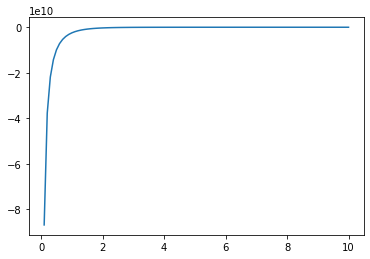

-86935823539.88057
0.1
-831.5287191035679


In [65]:
g = 100000
#I've seen this a (given m = 1) as 1.4e-15, here I've used 1.4 since radius is in fm right now. 
a = 1.4
m = 1

#In all equations I think epsilon_0 should hold, given this is a well used constant.
epsilon_0 = 8.854187817e-12
q1 = 1
q2 = 1
# plt.plot(x, y2, label='Coulomb potential')

mod = 1

# while True:
#     error = yukawa_potential(3, g, a, m) + coulomb_potential(3, epsilon_0, q1, q2)
#     if np.abs(error) < 100:
#         break
#     if error > 0:
#         g += 100000 * mod
#     else:
#         g -= 100000 * mod
#     mod *= 0.999

# print(g)

x = np.linspace(0.1, 10, 100)
y = yukawa_potential(x, g, a, m)
plt.plot(x, y, label='Yukawa potential')


y2 = coulomb_potential(x, epsilon_0, q1, q2)

# plt.plot(x, y + y2, label='Total potential')

plt.show()

print(min(y))
print(x[np.argmin(y)])
print(max(y))

#The exact value needs to be tuned to interplay well with coloumb forces


## New Theory

My main problem with the proton electron only model is how to we keep the balance of some electrons within the nucleus and others outside the nucleus. Basically there's a big balancing act that needs to be accounted for. Frankly this method has the same balancing act, the main difference is I don't need to come up with a strong potential between a electron and proton since in reality it does not exist.

Here I'm thinking about reintroducing a neutron and attempting to create 6 main potential force interactions:
N - Neutron P - Proton E - Electron

1. E - P As expected from coloumb force

2. P - P As expected from coloumb force

3. E - E As expected from coloumb force

2. P - N -> This is where I'm starting to experiment and where the strong force is taken into account. This should be based on the yukawa potential only. Protons Neutrons that are very close will want to stay close, with quicky diminishing values. The main issue here is that the exact force is based on many quark, meson, and hadron interactions, all of which we do not hold the necessary value to obtain. So rough estimates need to be used.

3. E - N -> This is what will create the "barrier" preventing an electron from getting close to nucleus. This will be a repulsive force (in contrast to a E - P interaction) Where the coloumb force is inverse to distance, this will be inverse to the distance. This means that for extremeley close distance (within the nucleus cloud) the neutron repulsion outperforms the proton attraction so the electron moves away. For farther distances, the proton attraction outperforms the neutron repulsion so the electron moves closer. The electron doesn't necessarily have to stay outside in an orbit, it just get near even on top of a nucleus but doesn't stay for very long. 

4. N - N -> This is more experimentation, this should match the P - P interaction of strong repulsion. A potential difference here is that it is dictated by the Yukawa potential rather than the coloumb equation.

This interplay does a few things an atom nucleus wants to be balanced having the same number of protons and neutrons. With too many protons or neutrons, the balance is out of wack and thus a nucleus is unstable. 

By having the N-N interplay instead be a strong force interaction, this should prevent nucleus from just attracting each other and meshing into a mega atom.

Electrons as described should be attracted to nuclei, but will not stick to them due to the repulsion from a neutron. 

These ideas are based on small sample, but hopefully interesting patterns should arise when we introduce a lot of particles (hence the simulation)

Because of the fact that we can no longer break down a neutron, some extreme fusion scenarios may not work out, but this is advantageous because if we leave the conditions as "Earth-like" then we can use a single estimation for all the necessary constants.